#  Multimodal AI System

## Assignment Overview

This notebook demonstrates a complete multimodal AI pipeline integrating:

- Large Language Models (Text Generation)
- Diffusion Models (Image Generation)
- Vision-Language Models (Image Understanding)
- Animated Output Simulation

All components use open-source models and run entirely within Google Colab without requiring paid APIs.


In [1]:
!pip install transformers diffusers accelerate torch torchvision torchaudio pillow imageio --quiet

## Section 1: Text-to-Text Generation

In this section, we use the FLAN-T5 model, an instruction-tuned transformer model, to generate creative conversation starters related to AI and multimodal systems.

This demonstrates:
- Prompt engineering
- Instruction-based text generation
- Controlled output generation


In [17]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

model_name = "google/flan-t5-base"

# Load tokenizer + model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

prompt = """
Give 5 creative conversation starters about:
1. Future of AI & Art
2. Multimodal Video Generation
3. Prompt Engineering
"""

# Tokenize input
inputs = tokenizer(prompt, return_tensors="pt")

# Generate output
outputs = model.generate(**inputs, max_new_tokens=150)

# Decode result
response = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("💬 Conversation Starters:\n")
print(response)


Loading weights:   0%|          | 0/282 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie shared.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning


💬 Conversation Starters:

1. What are the future of AI and art? 2. What are the future of video? 3. What are the future of robotics?


## Section 2: Text-to-Image Generation

Here, we use Stable Diffusion v1.5 to generate a high-quality AI image from a text prompt.

This demonstrates:
- Diffusion-based generative modeling
- Visual creativity through prompt engineering
- GPU-accelerated inference


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

StableDiffusionSafetyChecker LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


  0%|          | 0/50 [00:00<?, ?it/s]

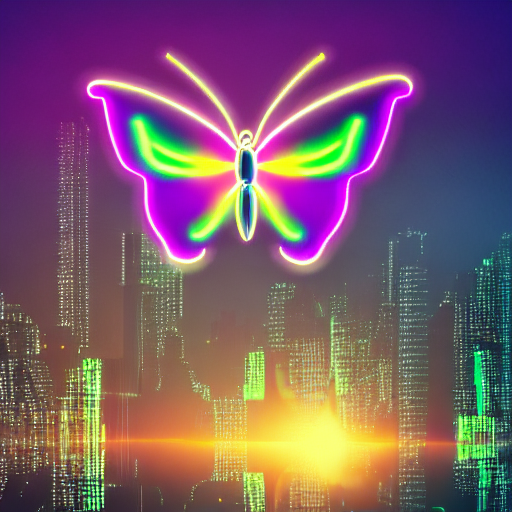

In [3]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda")

prompt = "A glowing neon butterfly flying over a futuristic cyberpunk city at sunset"

image = pipe(prompt).images[0]

image.save("generated_image.png")
image

## Section 3: Image-to-Text Understanding

We use the BLIP (Bootstrapped Language Image Pretraining) model to extract meaningful information from uploaded images.

This demonstrates:
- Vision-language modeling
- Multimodal understanding
- Context-aware caption generation


Upload an image


Saving photo-1583638666708-5ba77a6f8bd1.avif to photo-1583638666708-5ba77a6f8bd1 (1).avif

🖼 Uploaded Image:



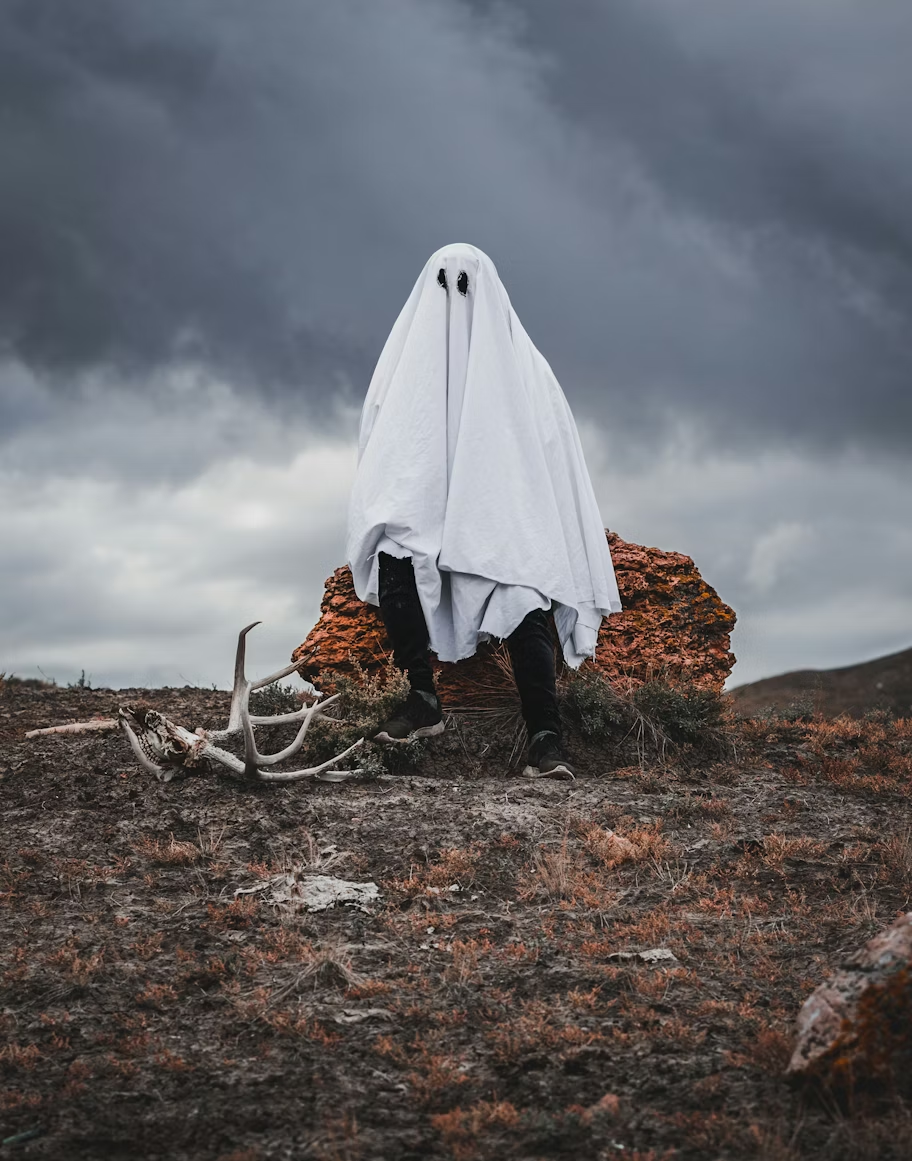

Loading weights:   0%|          | 0/473 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie text_decoder.cls.predictions.bias to text_decoder.cls.predictions.decoder.bias, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie text_decoder.bert.embeddings.word_embeddings.weight to text_decoder.cls.predictions.decoder.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
BlipForConditionalGeneration LOAD REPORT from: Salesforce/blip-image-captioning-base
Key                                       | Status     |  | 
------------------------------------------+------------+--+-
text_decoder.bert.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identic


🧠 Interesting Insight About Your Image:

a person in a white cloak is sitting on a hill


In [13]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
from google.colab import files
from IPython.display import display

print("Upload an image")
uploaded = files.upload()

for name in uploaded.keys():
    image_path = name

# 🔹 Load and Display the Image
raw_image = Image.open(image_path).convert('RGB')

print("\n🖼 Uploaded Image:\n")
display(raw_image)

# 🔹 Load BLIP Model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

inputs = processor(raw_image, return_tensors="pt")
out = model.generate(**inputs)

caption = processor.decode(out[0], skip_special_tokens=True)

print("\n🧠 Interesting Insight About Your Image:\n")
print(caption)


## Section 4: Animated GIF Simulation

We simulate video generation by producing multiple AI-generated frames and combining them into a looping GIF.

This demonstrates:
- Frame-by-frame generative modeling
- Animation assembly using Python
- Continuous visual output rendering


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

GIF animation saved!


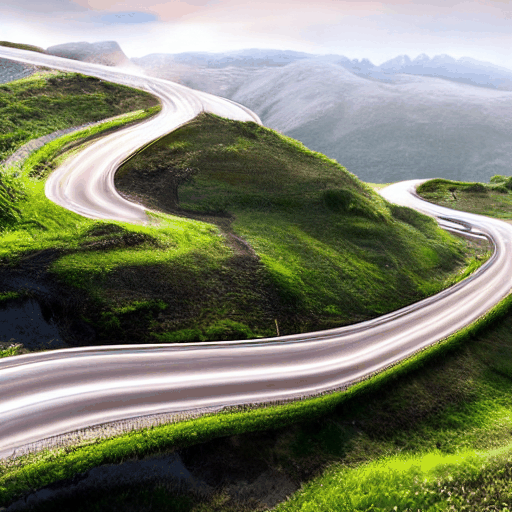

In [18]:
import imageio
from IPython.display import Image as IPImage, display

frames = []

prompt_for_gif = "Car making a smooth u turn with a drift in a curvy hill road. Use the same car in all the images."

for i in range(10):
    img = pipe(f"{prompt_for_gif}, motion blur level {i}").images[0]
    frames.append(img)

gif_path = "simple_animation.gif"

imageio.mimsave(gif_path, frames, duration=0.2, loop=0)

print("GIF animation saved!")

# Display the GIF inside Colab
display(IPImage(filename=gif_path))


# Conclusion

This project successfully demonstrates a fully integrated multimodal AI system combining:

- Text generation
- Image synthesis
- Image understanding
- Animation simulation

It highlights how open-source models can be combined to build powerful AI pipelines without relying on paid APIs.

The modular design allows easy upgrades to more advanced models such as Mistral, LLaMA, or advanced diffusion systems.

This implementation provides a strong foundation for future multimodal AI experimentation.
